## Part 1.1 : Data preprocessing

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
data = pd.read_json("users.json")
#Here we remove all rows containing null.
data =data[data['created'].notnull()]
data

,about,created,error,id,karma,submitted
0,NaN,1.510266e+09,NaN,gcgggfxsdg,-1.0,5
1,"Ruby, Open Source, Devops",1.325548e+09,NaN,sheerun,102.0,51
2,NaN,1.459331e+09,NaN,keypress,79.0,70
3,[ my public key: https:&#x2F;&#x2F;keybase.io&...,1.379698e+09,NaN,pyprism,1356.0,114
4,Email: ejstronge@gmail.com\nGithub: https:&#x2...,1.355740e+09,NaN,ejstronge,460.0,144
5,NaN,1.276201e+09,NaN,akira2501,880.0,304
6,NaN,1.382222e+09,NaN,matchagaucho,412.0,228
7,NaN,1.330724e+09,NaN,bberrry,273.0,49
8,NaN,1.475393e+09,NaN,sharjeelsidd,1.0,1
9,github.com&#x2F;allcentury,1.389810e+09,NaN,allcentury,56.0,41


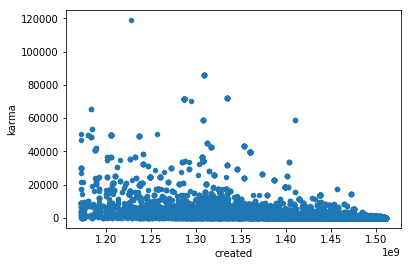

In [20]:
data = data.sort_values('created',ascending = True)
data.plot.scatter(x="created", y="karma")

## Part 1.2 : Model selection

Based on the scatter-plot above, we determined that a straight line would fit the best, because the bulk of the data points a close together in a horizontal line, and the rest can be considered outliers. So we have choosen a linear model.

## Part 1.3: Model training

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [72]:
# Here we reshape our columns.
karma = np.array(data["karma"]).reshape(9299, 1)
created = np.array(data['created']).reshape(9299, 1)

In [75]:
model = LinearRegression()
model.fit(created,karma)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
y_pred = model.predict(created)

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(karma, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(karma, y_pred))
model.intercept_

Coefficients: 
 [[ -3.68490613e-05]]
Mean squared error: 68167119.14
Variance score: 0.14


array([ 54944.17572095])

## Part 1.4: Model evaluation

The model uses the column 'Karma' as the Y-value. 'Karma' is the amount of points an user have accumulated. The column 'Created' is the X-value. It is a unix timestamp of when the user created their account.

We have choosen to use these parameters, because the task is to find out how much time an user has to spend to reach a 'karma' score of 1000. #TODO How are they helping you to predict how much time you need to be active in order to gain Hackernews points?

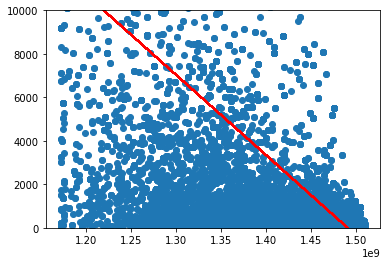

In [80]:
plt.scatter(created,karma)
plt.plot(created,y_pred,'r')
plt.ylim(0, 10000)
plt.show()

In [81]:
1000/2.75554492e-6 

362904626.5012439

In [82]:
(1000-55660.19119786)/-3.73430583e-05

1463730976.6848958

# Part 2


In [94]:
creat_and_submit = np.array(data[['created','submitted']]).reshape(9299, 2)
submit = np.array(data['submitted']).reshape(9299, 1)

In [91]:
model.fit(creat_and_submit,karma)
y_pred = model.predict(creat_and_submit)

In [101]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(karma, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(karma, y_pred))
model.intercept_

Coefficients: 
 [[ -6.70038250e-06   2.66071059e+00]]
Mean squared error: 22814189.97
Variance score: 0.71


array([ 9630.44853853])

In [106]:
(1000-9630.44853853)/(-6.70038250e-06+2.66071059e+00)

-3243.671184985077

484101171.3214178